# Матрица доступности

- Тут вариант как-то собирать это все для контекста + сценария из дорог, но я пока не знаю, как. 
- Поэтому промежуточный вариант: матрица расстояний с переводом `метров` в `минуты`.

In [43]:
import geopandas as gpd
import pandas as pd

## Объединение кварталов контекста и сценария

Читаем кварталы контекста

In [44]:
context_blocks = pd.read_pickle('./data/context_blocks.pickle')
context_blocks['is_project'] = False
crs = context_blocks.crs

Читаем кварталы сценария

In [45]:
scenario_blocks = pd.read_pickle('./data/scenario_blocks.pickle').to_crs(crs)
scenario_blocks['is_project'] = True

Объединяем одно с другим

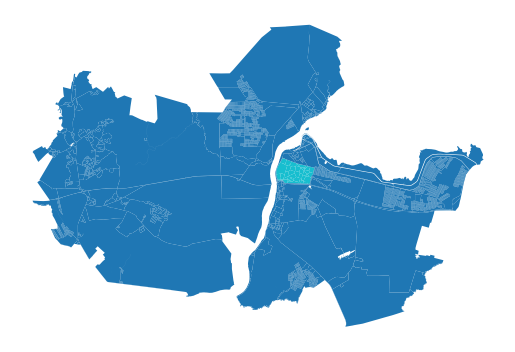

In [46]:
blocks = pd.concat([scenario_blocks, context_blocks]).reset_index(drop=True)
blocks['site_area'] = blocks.area
blocks.plot('is_project').set_axis_off()

## Считаем матрицу

In [47]:
from blocksnet.relations import calculate_distance_matrix

SPEED = 5 * 1_000 / 60

def get_accessibility_matrix(blocks : gpd.GeoDataFrame) -> pd.DataFrame:
  crs = blocks.estimate_utm_crs()
  dist_mx = calculate_distance_matrix(blocks.to_crs(crs))
  return dist_mx // SPEED

In [48]:
acc_mx = get_accessibility_matrix(blocks)
acc_mx.head()

,0,1,2,3,4,5,6,7,8,9,...,2690,2691,2692,2693,2694,2695,2696,2697,2698,2699
0,0.0,5.0,17.0,19.0,21.0,21.0,21.0,21.0,16.0,14.0,...,161.0,161.0,162.0,164.0,165.0,163.0,163.0,164.0,164.0,165.0
1,5.0,0.0,16.0,17.0,20.0,20.0,19.0,20.0,17.0,15.0,...,161.0,161.0,162.0,163.0,164.0,162.0,162.0,163.0,163.0,164.0
2,17.0,16.0,0.0,3.0,4.0,4.0,3.0,4.0,4.0,5.0,...,144.0,144.0,145.0,147.0,147.0,146.0,145.0,146.0,147.0,148.0
3,19.0,17.0,3.0,0.0,4.0,4.0,4.0,3.0,8.0,9.0,...,144.0,144.0,144.0,146.0,147.0,145.0,144.0,145.0,146.0,147.0
4,21.0,20.0,4.0,4.0,0.0,0.0,0.0,1.0,7.0,9.0,...,140.0,140.0,141.0,142.0,143.0,142.0,141.0,142.0,142.0,144.0


## Результат

- Объединенный слой кварталов сценария и контекста с доп столбцами `is_project : bool` и `site_area : float`.
- Матрицу доступности в `минутах`.

In [49]:
blocks.to_pickle('./data/blocks.pickle')
acc_mx.to_pickle('./data/acc_mx.pickle')